In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import model_selection

# Loading data

In [2]:
random_state = 888
data = pd.read_csv(os.path.join(os.getcwd(), "iris.csv"))

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data analysis and preprocessing

The preprocessing will be as follows: 
1. Remove all objects with omissions from the selection.
2. We will allocate 60% of the sample for training and further analysis.
3. Let's convert Species to a numeric attribute.


In [5]:
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index'], inplace=True)
data.drop(columns=['Id'], inplace=True)

In [6]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
target_dict = dict([(v, k) for k, v in enumerate(data['Species'].unique())])
data['Species'].replace(target_dict, inplace=True)
data.rename(columns={'Species': 'target'}, inplace=True)

In [8]:
target_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Training of classifiers

At the beginning, let's see how the selection of parameters on the grid works and how the quality of the sample splitting affects. Now and further we will consider 2 algorithms:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

To begin with, let's choose one hyperparameter that we will optimize:
 - kNN — (*n_neighbors*)
 - DecisonTree — (*max_depth*)
 
We will leave the other parameters in the default values.

For each algorithm, we will select the optimal values of these hyperparameters. Let's plot the average quality value by cross-validation of the algorithm for a given hyperparameter value, on which we will also display the confidence interval.

In [10]:
y = data.pop('target')
X = data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

In [12]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
68,6.2,2.2,4.5,1.5
5,5.4,3.9,1.7,0.4
114,5.8,2.8,5.1,2.4
79,5.7,2.6,3.5,1.0
16,5.4,3.9,1.3,0.4


In [13]:
parametrs = {
    'n_neighbors': range(2, 35, 1)
}

grid = GridSearchCV(KNeighborsClassifier(), parametrs, cv=5)
grid.fit(X_train, y_train)
print('num neighbours: ', grid.best_params_['n_neighbors'])


neigh = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

num neighbours:  19


0.95

In [14]:
parametrs = {
    'max_depth': range(2, 10, 1)
}

grid = GridSearchCV(DecisionTreeClassifier(), parametrs, cv=5)
grid.fit(X_train, y_train)
print('max_depth: ', grid.best_params_['max_depth'])

dtc = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], random_state=random_state)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

max_depth:  4


0.9666666666666667

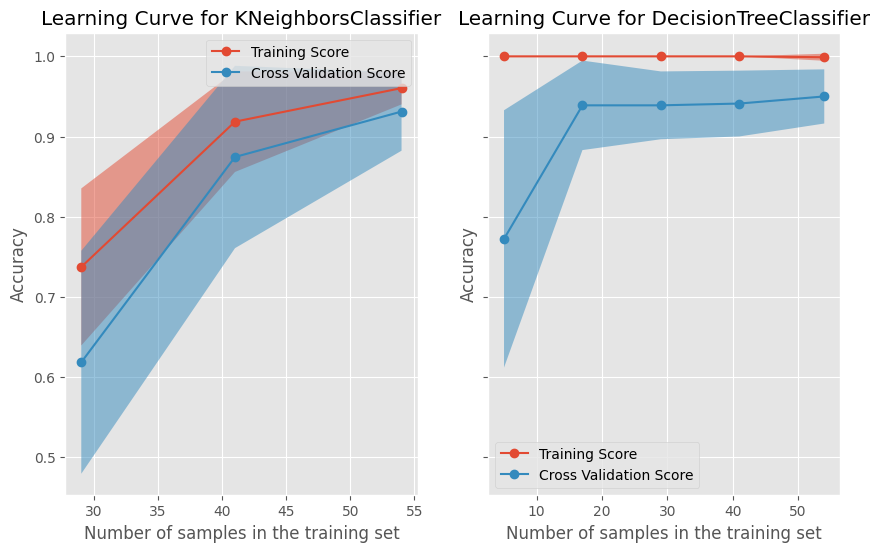

In [15]:
plt.style.use("ggplot") 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

ax[0].grid(True)
ax[1].grid(True)

common_params = {
    "X": X_train,
    "y": y_train,
    "cv": ShuffleSplit(n_splits=50, test_size=0.4, random_state=random_state),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([neigh, dtc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Cross Validation Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

## PCA transformation

Let's choose the number of components so that the variance value exceeds the percentage specified by the parameter n_components.

In [16]:

pca = PCA(n_components=0.978)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
print('num components: ', pca.n_components_)

num components:  3


So you can leave 3 out of 4 components and the quality will not drop much. You can even leave 1, then n_components=0.9

Text(0.5, 1.0, 'Scree Plot')

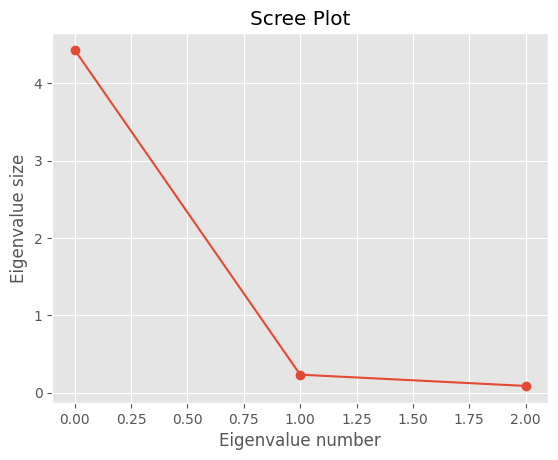

In [17]:
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

## Training classifiers on data transformed by PCA

Let's train the same classifiers on the transformed data using PCA. Let's select the optimal values of the studied hyperparameters for the new data. Let's plot the average quality value by cross-validation of the algorithm for a given hyperparameter value, on which we will also display the confidence interval.

In [18]:
parametrs = {
    'n_neighbors': range(2, 35, 1)
}

grid = GridSearchCV(KNeighborsClassifier(), parametrs, cv=5)
grid.fit(X_train_pca, y_train)
print('num neighbours: ', grid.best_params_['n_neighbors'])


neigh_pca = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
neigh_pca.fit(X_train_pca, y_train)
neigh_pca.score(pca.transform(X_test), y_test)

num neighbours:  15


0.95

In [19]:
parametrs = {
    'max_depth': range(1, 20, 1)
}

grid = GridSearchCV(DecisionTreeClassifier(), parametrs, cv=5)
grid.fit(X_train_pca, y_train)
grid.best_params_
print('max_depth: ', grid.best_params_['max_depth'])

dtc_pca = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], random_state=random_state)
dtc_pca.fit(X_train_pca, y_train)
dtc_pca.score(pca.transform(X_test), y_test)

max_depth:  2


0.9

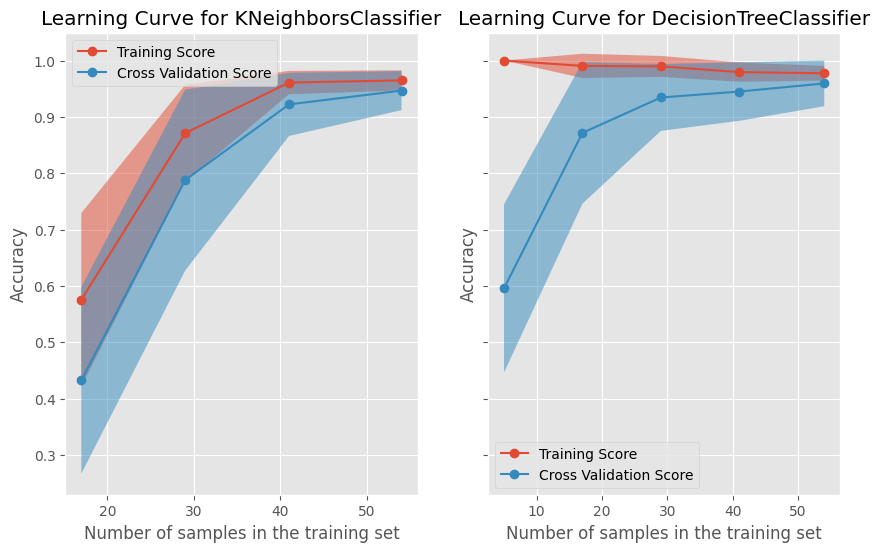

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

ax[0].grid(True)
ax[1].grid(True)

common_params = {
    "X": X_train_pca,
    "y": y_train,
    "cv": ShuffleSplit(n_splits=50, test_size=0.4, random_state=random_state),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([neigh_pca, dtc_pca]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Cross Validation Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

The KNeighborsClassifier algorithm lost the least. DecisionTreeClassifier began to behave worse on small quantities of training set and sank more in quality.


## Testing all models

Test all the constructed models (including those with and without PCA transformation) on the data that was postponed for the test.

In [21]:
results = []
names = []
scoring = 'accuracy'
models = {'DecisionTreeClassifier': dtc, 
          'DecisionTreeClassifierWithPCA': dtc_pca, 
          'KNeighborsClassifier': neigh, 
          'KNeighborsClassifierWithPCA': neigh_pca}

for name, model in models.items():
        kfold = model_selection.KFold(n_splits=10, random_state=random_state, shuffle=True)
        if 'PCA' in name:
                cv_results = model_selection.cross_val_score(model, pca.transform(X_test), y_test, cv=kfold, scoring=scoring)
        else:
                cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

DecisionTreeClassifier: 0.900000 (0.110554)
DecisionTreeClassifierWithPCA: 0.866667 (0.145297)
KNeighborsClassifier: 0.900000 (0.133333)
KNeighborsClassifierWithPCA: 0.916667 (0.134371)


In [22]:
boxprops = dict(linestyle='-', linewidth=1.5, color='navy')
flierprops = dict(marker='o', markersize=3, linestyle='none')
whiskerprops = dict(color='navy')
capprops = dict(color='navy')
medianprops = dict(linewidth=2, linestyle='-', color='salmon')

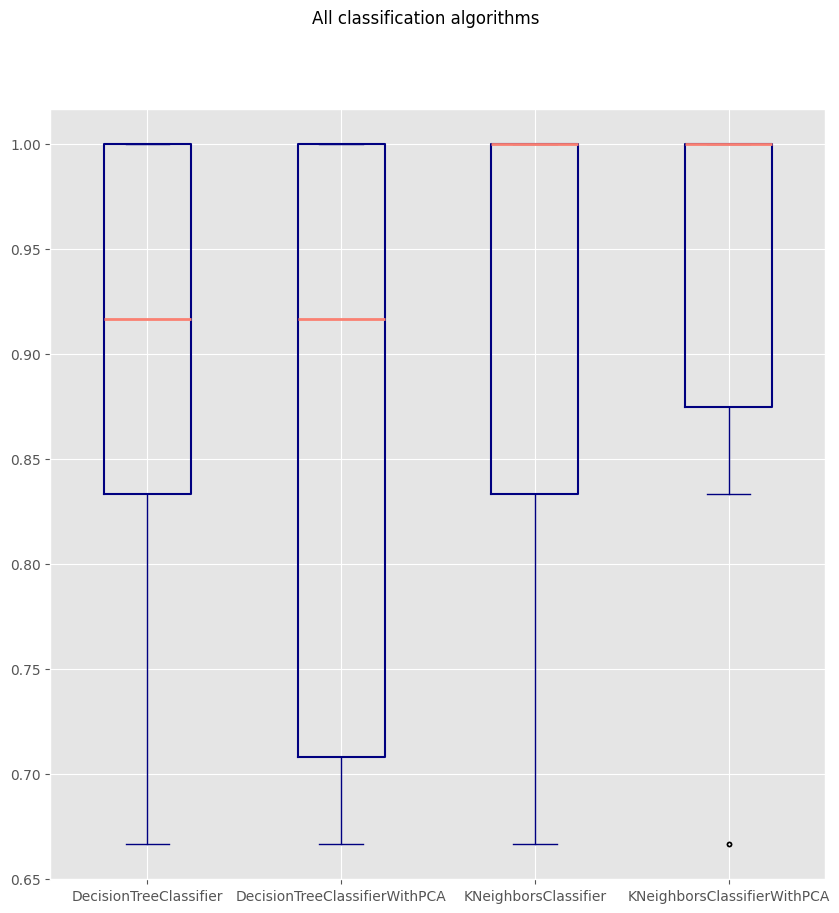

In [23]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('All classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results, notch=False, boxprops=boxprops, whiskerprops=whiskerprops,capprops=capprops, flierprops=flierprops, medianprops=medianprops,showmeans=False)
ax.set_xticklabels(names)
plt.show()